# Índice de contenidos
1. Antes de empezar:

2. Reto 1 - Importar y describir el conjunto de datos

    2.0.0.1 Explore el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentra?

3. Reto 2 - Limpieza y transformación de datos

4. Reto 3 - Preprocesamiento de datos

    4.0.0.1 Utilizaremos el StandardScaler de sklearn.preprocessing y escalaremos nuestros datos. Lea más sobre StandardScaler aquí.

5. Reto 4 - Agrupación de datos con K-Means

6. Reto 5 - Agrupación de datos con DBSCAN

7. Reto 6 - Comparar K-Means con DBSCAN

8. Reto adicional 2 - Cambiar el número de clusters de K-Means

9. Bonus Challenge 3 - Cambiar DBSCAN eps y min_samples

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [23]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Desafío 1 - Importar y describir el conjunto de datos

En este laboratorio, utilizaremos un conjunto de datos que contiene información sobre las preferencias de los clientes. Analizaremos cuánto gasta cada cliente en un año en cada subcategoría de la tienda de comestibles e intentaremos encontrar similitudes mediante la agrupación.

El origen del conjunto de datos es [aquí](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [24]:
# loading the data: Wholesale customers data
customers = pd.read_csv('../data/Wholesale customers data.csv')


1)	FRESH: annual spending (m.u.) on fresh products (Continuous);
2)	MILK: annual spending (m.u.) on milk products (Continuous);
3)	GROCERY: annual spending (m.u.)on grocery products (Continuous);
4)	FROZEN: annual spending (m.u.)on frozen products (Continuous)
5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
7)	CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8)	REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)

#### Explora el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentras?

Lista de comprobación:

* ¿Qué significa cada columna?
* ¿Hay datos categóricos que convertir?
* ¿Hay que eliminar datos que faltan?
* Colinealidad de columnas: ¿hay correlaciones altas?
* Estadísticas descriptivas: ¿hay que eliminar algún valor atípico?
* Distribución de los datos por columnas: ¿está sesgada la distribución?
* Etc.

Información adicional: Hace más de un siglo, un economista italiano llamado Vilfredo Pareto descubrió que aproximadamente el 20% de los clientes representan el 80% de las ventas minoristas típicas. Esto se denomina [principio de Pareto](https://en.wikipedia.org/wiki/Pareto_principle). Compruebe si este conjunto de datos presenta esta característica.

In [25]:
# What the dataset looks like?
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [26]:
# Number of rows and columns
customers.shape

(440, 8)

In [27]:
# Get information about the data set
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [28]:
# What are the data types?
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [29]:
# Revisar la cantidad de valores nulos en cada columna
missing_values = customers.isnull().sum()

# Mostrar las columnas que tienen valores faltantes
print("Valores faltantes por columna:")
print(missing_values[missing_values > 0])

Valores faltantes por columna:
Series([], dtype: int64)


In [30]:
# Describe the data
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


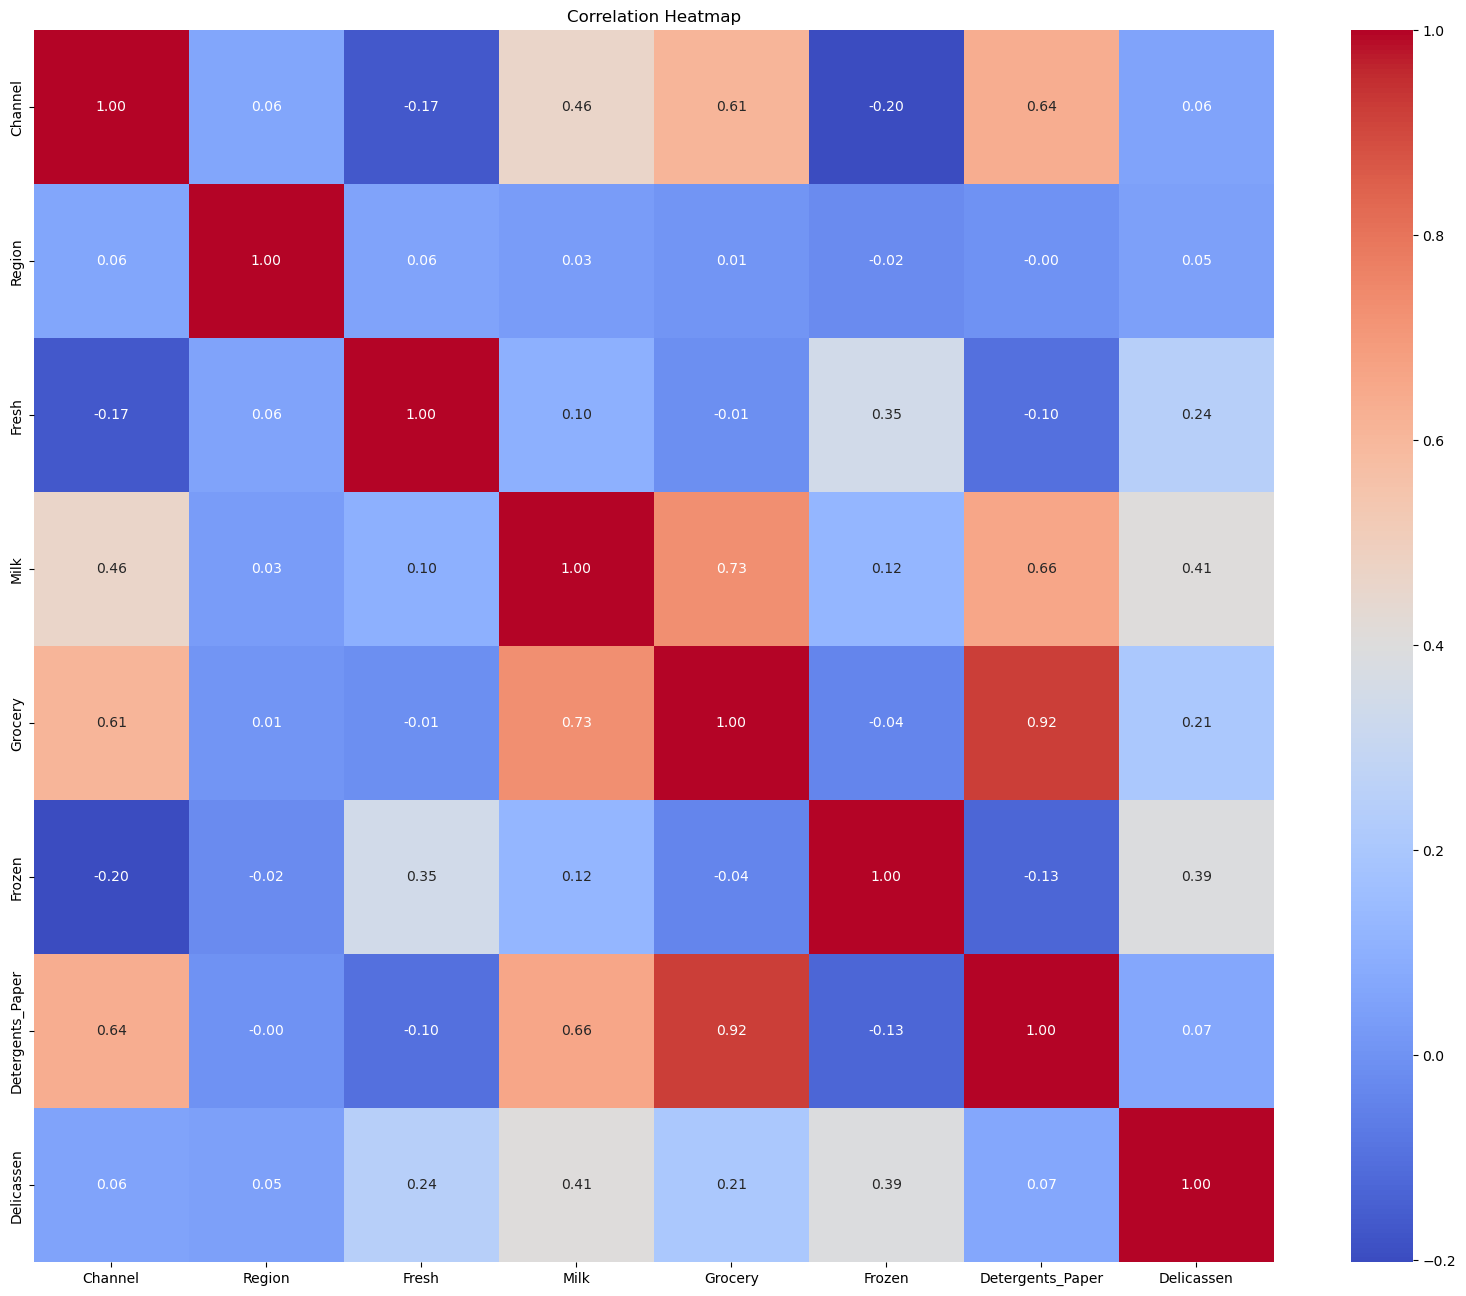

In [31]:
# Correlation
corr_matrix = customers.corr()

# Correlation heatmap

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

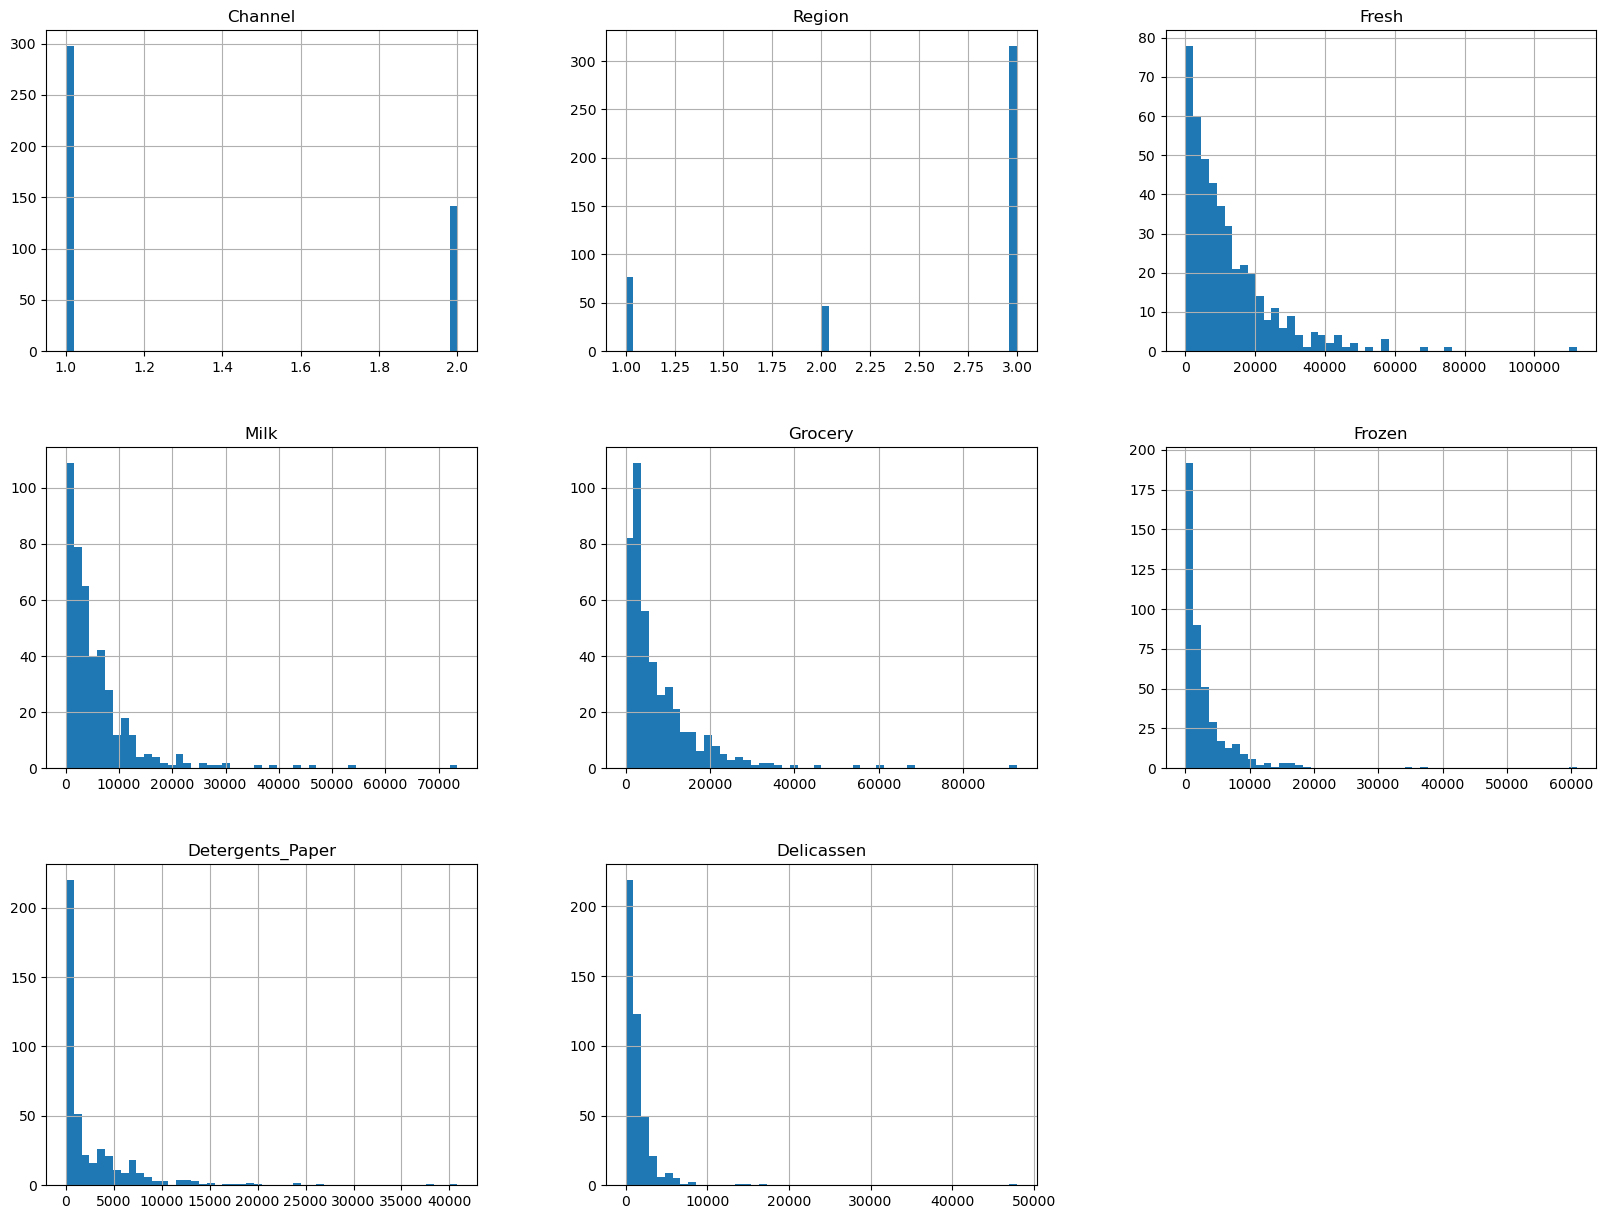

In [32]:
# Plot the data distribution

customers.hist(bins = 50, figsize=(20,15))
plt.show() 

**Tus observaciones aquí**

+ Channel, Grocery, Milk y Detergents Paper tienen una gran correlación
+ Fresh y Frozen tienen correlación negativa con Channel
+ Los datos tienen una distribución exponencial, excepto Region y Channel
+ Region y Channel son categoricas encoded
+ Los rangos de datos son muy distintos entre variables




# Reto 2 - Limpieza y transformación de datos

Si tu conclusión del reto anterior es que los datos necesitan limpieza/transformación, hazlo en las celdas de abajo. Sin embargo, si su conclusión es que los datos no necesitan ser limpiados o transformados, no dudes en saltarte este reto. Si optas por esta última opción, explica los motivos.

Los datos no necesitan limpieza:
+ No hay valores null
+ Todas las columnas son numericas
+ Las distribuciones son exponenciales, sin outliers

# Reto 3 - Preprocesamiento de datos

Uno de los problemas del conjunto de datos es que los rangos de valores son notablemente diferentes en las distintas categorías (por ejemplo, `Fresh` y `Grocery` en comparación con `Detergents_Paper` y `Delicassen`). Si hiciste esta observación en el primer reto, ¡has hecho un gran trabajo! Esto significa que no sólo has completado las preguntas de bonificación en el anterior laboratorio de Aprendizaje Supervisado, sino que también has investigado en profundidad sobre [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). ¡Sigue trabajando así de bien!

Diversos rangos de valores en diferentes características podrían causar problemas en nuestra agrupación. La forma de reducir el problema es mediante el escalado de características. Volveremos a utilizar esta técnica con este conjunto de datos.

#### Utilizaremos el `StandardScaler` de `sklearn.preprocessing` y escalaremos nuestros datos. Lee más sobre `StandardScaler` [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*Después de escalar tus datos, asigna los datos transformados a una nueva variable `customers_scale`.

In [35]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Initialize the scaler and apply standardization
scaler = StandardScaler()

# Fit and transform the data
customers_scaled = scaler.fit_transform(customers)



# Reto 4 - Agrupación de datos con K-Means

Ahora vamos a agrupar los datos con K-Means primero. Inicia el modelo K-Means, luego ajusta tus datos escalados. En los datos devueltos por el método `.fit`, hay un atributo llamado `labels_` que es el número de cluster asignado a cada registro de datos. Lo que puede hacer es asignar estas etiquetas de nuevo a `customers` en una nueva columna llamada `customers['labels']`. Entonces verá los resultados de cluster de los datos originales.

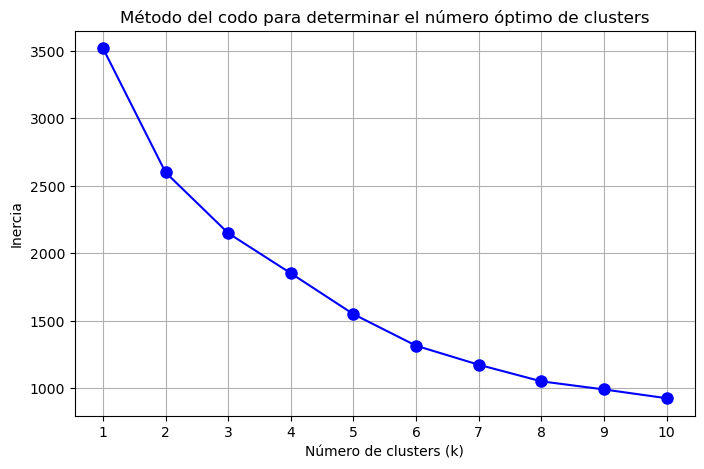

In [45]:
from sklearn.cluster import KMeans

# k range we want to iterate (clusters)
K = range(1, 11)

# Score for every K
score_inertia = []

for k in K:
    # initiate the model kmeans for every k
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit scaled data to the model
    kmeans.fit(customers_scaled)
    
    # calculate the inertia
    score_inertia.append(kmeans.inertia_)

# Graph the elbow method
plt.figure(figsize=(8, 5))
plt.plot(K, score_inertia, 'bo-', markersize=8)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.xticks(K)
plt.grid()
plt.show()

    


### Viendo el elbow pododríamos escoger 2 como el número de clusters correctos

In [46]:
#Kmeans con 2 clusters
kmeans_2 = KMeans(n_clusters=2).fit(customers_scaled)

labels = kmeans_2.predict(customers_scaled)

Cuenta los valores en `labels`.

In [47]:
customers['Label'] = labels

customers.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


# Reto 5 - Clustering de datos con DBSCAN

Ahora vamos a agrupar los datos utilizando DBSCAN. Utiliza `DBSCAN(eps=0.5)` para iniciar el modelo y, a continuación, ajusta los datos escalados. En los datos devueltos por el método `.fit`, asigna las `labels_` de nuevo a `customers['labels_DBSCAN']`. Ahora tus datos originales tienen dos etiquetas, una de K-Means y la otra de DBSCAN.

In [48]:
from sklearn.cluster import DBSCAN 

dbscan = DBSCAN(eps = 0.5, min_samples = 3).fit(customers_scaled) 
labels_dbscan = dbscan.labels_



Cuenta los valores en `labels_DBSCAN`.

In [49]:
# Your code here
customers['Label_DBSCAN'] = labels_dbscan

customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label,Label_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,1,0
1,2,3,7057,9810,9568,1762,3293,1776,1,1
2,2,3,6353,8808,7684,2405,3516,7844,1,-1
3,1,3,13265,1196,4221,6404,507,1788,0,4
4,2,3,22615,5410,7198,3915,1777,5185,1,-1


# Reto 6 - Comparar K-Means con DBSCAN

Ahora queremos comparar visualmente cómo K-Means y DBSCAN han agrupado nuestros datos. Crearemos gráficos de dispersión para varias columnas. Para cada uno de los siguientes pares de columnas, traza un gráfico de dispersión utilizando `labels` y otro utilizando `labels_DBSCAN`. Ponlos uno al lado del otro para compararlos. ¿Qué algoritmo de agrupación tiene más sentido?

Columnas a visualizar:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualice `Detergentes_Papel` como X y `Leche` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [56]:
def plot(data, x, y, hue, title):
    sns.scatterplot(data=data,
                    x=x, 
                    y=y,
                    hue=hue,)
    plt.title(title)
    return plt.show();

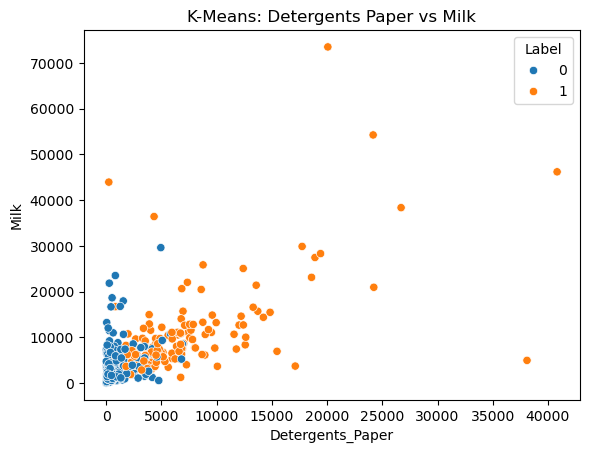

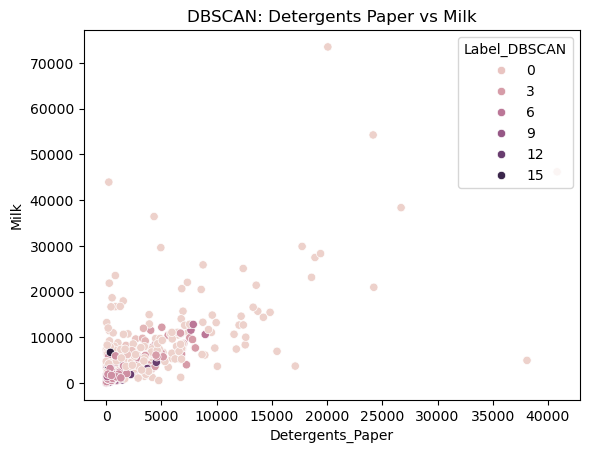

In [57]:
# Graficar para K-Means
plot(customers, 'Detergents_Paper', 'Milk', 'Label', 'K-Means: Detergents Paper vs Milk')

# Graficar para DBSCAN
plot(customers, 'Detergents_Paper', 'Milk', 'Label_DBSCAN', 'DBSCAN: Detergents Paper vs Milk')


Visualice `Grocery` como X y `Fresh` como Y mediante `labels` y `labels_DBSCAN` respectivamente

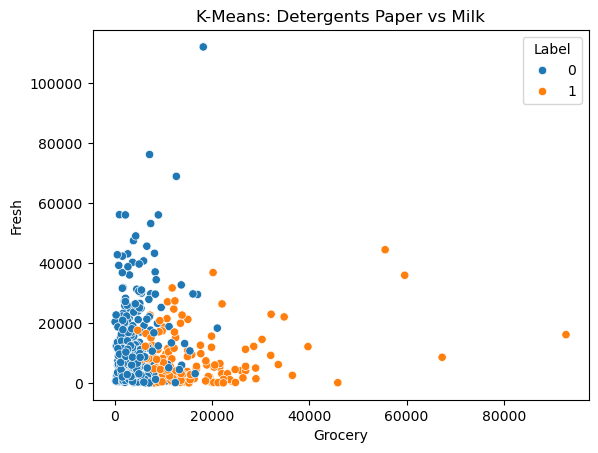

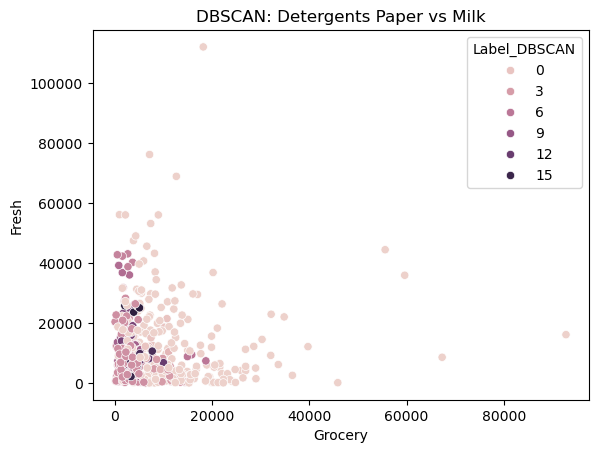

In [58]:
# Graficar para K-Means
plot(customers, 'Grocery', 'Fresh', 'Label', 'K-Means: Detergents Paper vs Milk')

# Graficar para DBSCAN
plot(customers, 'Grocery', 'Fresh', 'Label_DBSCAN', 'DBSCAN: Detergents Paper vs Milk')


Visualice `Frozen` como X y `Delicassen` como Y mediante `labels` y `labels_DBSCAN` respectivamente

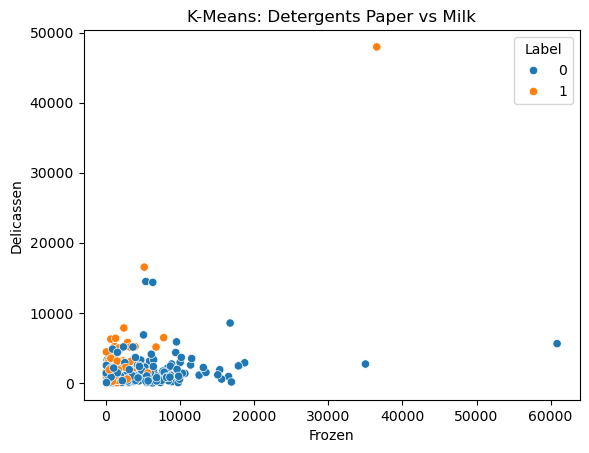

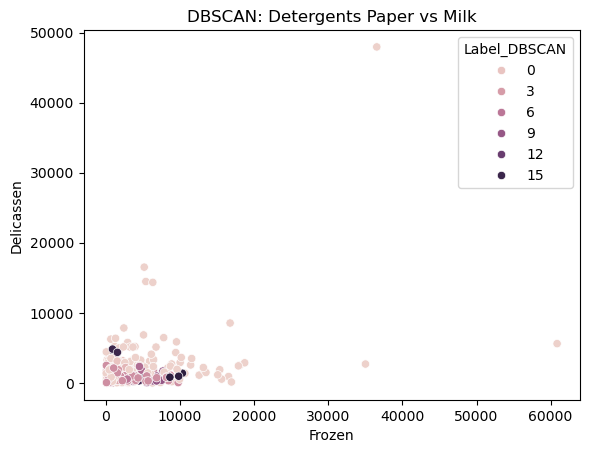

In [59]:
# Graficar para K-Means
plot(customers, 'Frozen', 'Delicassen', 'Label', 'K-Means: Detergents Paper vs Milk')

# Graficar para DBSCAN
plot(customers, 'Frozen', 'Delicassen', 'Label_DBSCAN', 'DBSCAN: Detergents Paper vs Milk')


Vamos a utilizar un groupby para ver cómo la media difiere entre los grupos. Agrupamos `customers` por `labels` y `labels_DBSCAN` respectivamente y calculamos las medias de todas las columnas.

In [62]:
# Agrupar por 'labels' (K-Means) y calcular las medias
grouped_kmeans = customers.groupby('Label').mean()

# Agrupar por 'labels_DBSCAN' (DBSCAN) y calcular las medias
grouped_dbscan = customers.groupby('Label_DBSCAN').mean()

# Mostrar las medias
print("Medias por grupos de K-Means:")
print(grouped_kmeans)

print("\nMedias por grupos de DBSCAN:")
print(grouped_dbscan)



Medias por grupos de K-Means:
        Channel    Region         Fresh          Milk       Grocery  \
Label                                                                 
0      1.023026  2.503289  13562.500000   3317.184211   3941.569079   
1      1.992647  2.632353   8508.316176  11337.742647  16914.154412   

            Frozen  Detergents_Paper   Delicassen  Label_DBSCAN  
Label                                                            
0      3675.608553        795.546053  1268.595395      3.322368  
1      1722.536765       7544.198529  2097.720588      0.257353  

Medias por grupos de DBSCAN:
               Channel    Region         Fresh          Milk       Grocery  \
Label_DBSCAN                                                                 
-1            1.487923  2.415459  14173.483092   9094.980676  12604.352657   
 0            2.000000  3.000000  14910.333333   7475.000000   7850.666667   
 1            2.000000  3.000000   7311.333333  10344.333333   9974.000000   
 

¿Qué algoritmo funciona mejor?

**Tus observaciones aquí**

El rendimiento de los algoritmos...

# Bonus Challenge 2 - Cambiar el número de clusters de K-Means

Como hemos mencionado antes, no tenemos que preocuparnos por el número de clusters con DBSCAN porque lo decide automáticamente en función de los parámetros que le enviemos. Pero con K-Means, tenemos que suministrar el parámetro `n_clusters` (si no se suministra `n_clusters`, el algoritmo utilizará `8` por defecto). Debe saber que el número óptimo de clusters varía en función del conjunto de datos. K-Means puede funcionar mal si se utiliza un número incorrecto de clusters.

En el aprendizaje automático avanzado, los científicos de datos prueban diferentes números de clusters y evalúan los resultados con medidas estadísticas (leer [aquí](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). Hoy no vamos a utilizar medidas estadísticas, sino nuestros ojos. En las celdas de abajo, experimenta con distintos números de conglomerados y visualízalos con gráficos de dispersión. ¿Qué número de clusters parece funcionar mejor para K-Means?

In [ ]:
# Your code here


**Tus observaciones aquí**

* Viendo los gráficos del k-means ...

# Bonus Challenge 3 - Cambiar `eps` y `min_samples` de DBSCAN

Experimenta cambiando los parámetros `eps` y `min_samples` de DBSCAN. Mira cómo difieren los resultados con la visualización de gráficos de dispersión.

In [ ]:
# Your code here


**Tus observaciones aquí**

    + El DBscan ajustado...
    
